In [ ]:
# Import necessary libraries and verify the PyTorch version
import torch

# Display the GPU details and verify the availability of the GPU
!nvidia-smi  # This command shows the status of the GPU (if available)

# Check if a GPU is available and print the name of the GPU, otherwise indicate no GPU availability
print("Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU available")

# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the experiment name (can be used for logging or saving results)
_exp_name = 'mnist'

# Import additional libraries needed for data processing and model training
import torch.optim  # Optimizers for training models
from torch.utils.data import DataLoader, random_split  # DataLoader to load datasets in batches
from torchvision import datasets, transforms  # Datasets (MNIST) and image transformations
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizing results (e.g., loss curves)
import pandas as pd  # For working with data in a structured format (if needed)
import random  # For setting seeds and generating random numbers
from tqdm.auto import tqdm  # For displaying progress bars during loops

# Define the image transformation pipeline for preprocessing
transform = transforms.Compose([
    # Resize images to a fixed size of 28x28 pixels (standard MNIST input size)
    transforms.Resize((28, 28)),
    
    # Convert the image to a PyTorch tensor, which is required for model training
    transforms.ToTensor(),
    
    # Normalize the pixel values to have a mean of 0.5 and a standard deviation of 0.5
    # This is commonly done for better training convergence, as most models perform better on normalized data
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the MNIST dataset for both training and testing
# 'train=True' loads the training set, 'train=False' loads the test set
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Print the size of the training and test datasets to verify successful loading
print(f"Train dataset has {len(train_dataset)} samples.")
print(f"Test dataset has {len(test_dataset)} samples.")



Fri Dec  6 18:48:20 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.37       Driver Version: 527.37       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P0    N/A /  N/A |      0MiB /  4096MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

C:\Users\axiag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from sklearn import svm  # Import the Support Vector Machine (SVM) module from scikit-learn
from sklearn.metrics import accuracy_score  # Import the accuracy metric for model evaluation
import numpy as np  # Import NumPy for numerical operations

# Define a function to prepare the data
def prepare_data(dataset):
    """
    Preprocess the dataset by flattening the images and converting them into numpy arrays
    suitable for the SVM model. The labels are also extracted.
    
    Args:
    dataset (torch.utils.data.Dataset): The dataset to be processed (e.g., train or test dataset).
    
    Returns:
    tuple: A tuple containing the features (flattened images) and labels as numpy arrays.
    """
    # Flatten each image (28x28 pixels) and convert it into a 1D array
    # Convert the image from a PyTorch tensor to a NumPy array
    data = [sample[0].numpy().flatten() for sample in dataset]
    
    # Extract the labels (target variable)
    labels = [sample[1] for sample in dataset]
    
    # Return the features and labels as NumPy arrays
    return np.array(data), np.array(labels)

# Flatten the images in both the training and test datasets and extract their labels
X_train, y_train = prepare_data(train_dataset)  # Training data
X_test, y_test = prepare_data(test_dataset)  # Test data

# Normalize the data to scale pixel values between 0 and 1
# Since the images were previously normalized to the range [-1, 1], we reverse this transformation
X_train = (X_train + 1) / 2  # Rescale values from [-1, 1] to [0, 1]
X_test = (X_test + 1) / 2  # Same transformation for the test data


In [ ]:
# Train the Support Vector Machine (SVM) model using the RBF kernel
print("Training SVM...")

# Initialize the SVM classifier with a Radial Basis Function (RBF) kernel.
# The 'C' parameter controls the regularization strength (C=1.0 is a moderate value).
# The 'gamma' parameter controls the influence of a single training example (set to 'scale' which is 1 / (n_features * X.var()) by default).
clf = svm.SVC(kernel='rbf', C=1.0, gamma='scale')

# Fit the SVM model to the training data
# The 'fit' method trains the model by finding the optimal hyperplane that maximizes the margin between the classes
clf.fit(X_train, y_train)

# Evaluate the trained model on the test dataset
print("Evaluating SVM...")

# Use the trained SVM model to make predictions on the test dataset
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model by comparing the predicted labels to the true labels
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model on the test data
print(f"Test Accuracy: {accuracy:.4f}")



Training SVM...


In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for visualization

def visualize_predictions(X, y_true, y_pred, indices):
    """
    Visualizes a subset of predicted and true labels for a set of test images.
    
    Args:
    X (numpy.ndarray): The dataset of flattened images (e.g., X_test).
    y_true (numpy.ndarray): The true labels corresponding to the images.
    y_pred (numpy.ndarray): The predicted labels for the images.
    indices (list): A list of indices that specify which images to visualize.
    """
    # Create a figure with a specific size for the grid of images
    plt.figure(figsize=(5, 3))
    
    # Loop through each index in the provided list of indices
    for i, idx in enumerate(indices):
        # Create a subplot for each image, organized in a 2x5 grid
        plt.subplot(2, 5, i + 1)
        
        # Reshape the flattened image back to 28x28 pixels for visualization
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        
        # Set the title for the subplot to show the true and predicted labels
        plt.title(f"True: {y_true[idx]}\nPred: {y_pred[idx]}")
        
        # Remove the axis for a cleaner presentation of the images
        plt.axis('off')
    
    # Adjust the layout to make sure the subplots do not overlap
    plt.tight_layout()
    
    # Show the visualization
    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Import necessary modules for confusion matrix

# Test the model on a batch of test images and visualize the results
def test_model_on_images(X_test, y_test, n_samples=10):
    """
    Tests the trained model on a random sample of test images and visualizes the predictions.

    Args:
    X_test (numpy.ndarray): The test dataset of flattened images (e.g., X_test).
    y_test (numpy.ndarray): The true labels corresponding to the test images.
    n_samples (int): The number of random samples to select for testing and visualization.

    Returns:
    y_true (numpy.ndarray): The true labels of the selected test samples.
    y_pred (numpy.ndarray): The predicted labels for the selected test samples.
    """
    # Randomly select n_samples indices from the test set without replacement
    indices = np.random.choice(len(X_test), size=n_samples, replace=False)
    
    # Extract the corresponding images and true labels for the selected indices
    X_samples = X_test[indices]
    y_true = y_test[indices]
    
    # Use the trained classifier to predict labels for the selected test samples
    y_pred = clf.predict(X_samples)

    # Visualize the predictions along with true labels for the selected samples
    visualize_predictions(X_samples, y_true, y_pred, range(n_samples))
    
    # Return the true and predicted labels for analysis
    return y_true, y_pred


Testing on multiple images...


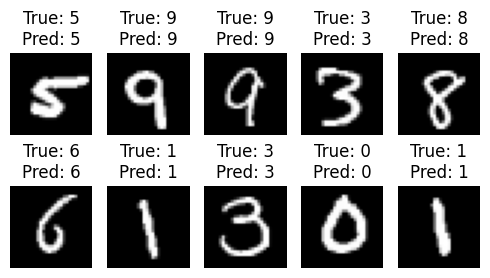

In [ ]:
# Test on random images and display the results
print("Testing on multiple images...")

# Number of random samples to select for testing
n_samples = 10  # You can adjust this value based on how many images you want to visualize

# Call the function to test the model on the random samples and visualize the predictions
y_true, y_pred = test_model_on_images(X_test, y_test, n_samples)


Computing confusion matrix...


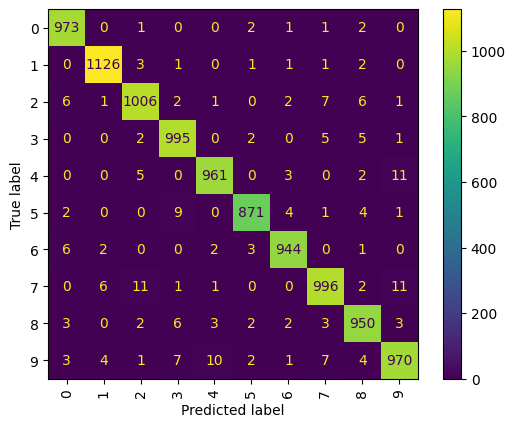

In [ ]:
# Compute confusion matrix for the entire test dataset
print("Computing confusion matrix...")
y_test_pred = clf.predict(X_test)  # Predict for all test samples
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.savefig('confusionMatrix_SVM_MNIST.png', dpi=300, bbox_inches='tight') 
plt.show()